In [ ]:
!pip install minisom matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=e762b785dfa1cc329772c2db791565dbba46214ccfc1266a7e1ebee42133cf22
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
from IPython import display

import numpy as np
from minisom import MiniSom
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Download MNIST dataset
X_mnist, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Normalize data
X_mnist = X_mnist / 255.0



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X_mnist = X_mnist[y == '1']
X_mnist.shape

(7877, 784)

# miniSOM

In [ ]:
def plot_som_centroids(som, som_size):
    # Plot the weights of the Kohonen map
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):
            weight = som.get_weights()[i, j].reshape(28, 28)  # Reshape weights to 28x28 (MNIST images size)
            # print(weight)
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(weight, cmap='gray')
            plt.axis('off')
    plt.show()

In [ ]:
import umap

In [ ]:
# Initialize Kohonen map (SOM)
som_size = 20  # 10x10 grid
som = MiniSom(som_size, som_size, X_mnist.shape[1], sigma=1.0, learning_rate=0.5)

# Train SOM

In [ ]:
print("Training Kohonen map...")

for epoch in range(10):
    print(f"Epoch {epoch+1}/10, Quantization error:, {som.quantization_error(X_mnist)}", end=" ")

    som.train_random(X_mnist, X_mnist.shape[0])  # Train with 60000 iterations
    print()

print("Training completed.")

Training Kohonen map...
Epoch 1/10, Quantization error:, 7.047642513315612 
Epoch 2/10, Quantization error:, 2.128875673041213 
Epoch 3/10, Quantization error:, 2.056372303950297 
Epoch 4/10, Quantization error:, 2.006543562764135 
Epoch 5/10, Quantization error:, 1.9798960321677423 
Epoch 6/10, Quantization error:, 1.9476492539546801 
Epoch 7/10, Quantization error:, 1.9400345177530287 
Epoch 8/10, Quantization error:, 1.9447298737059915 
Epoch 9/10, Quantization error:, 1.9407527003100178 
Epoch 10/10, Quantization error:, 1.9433742367306968 
Training completed.


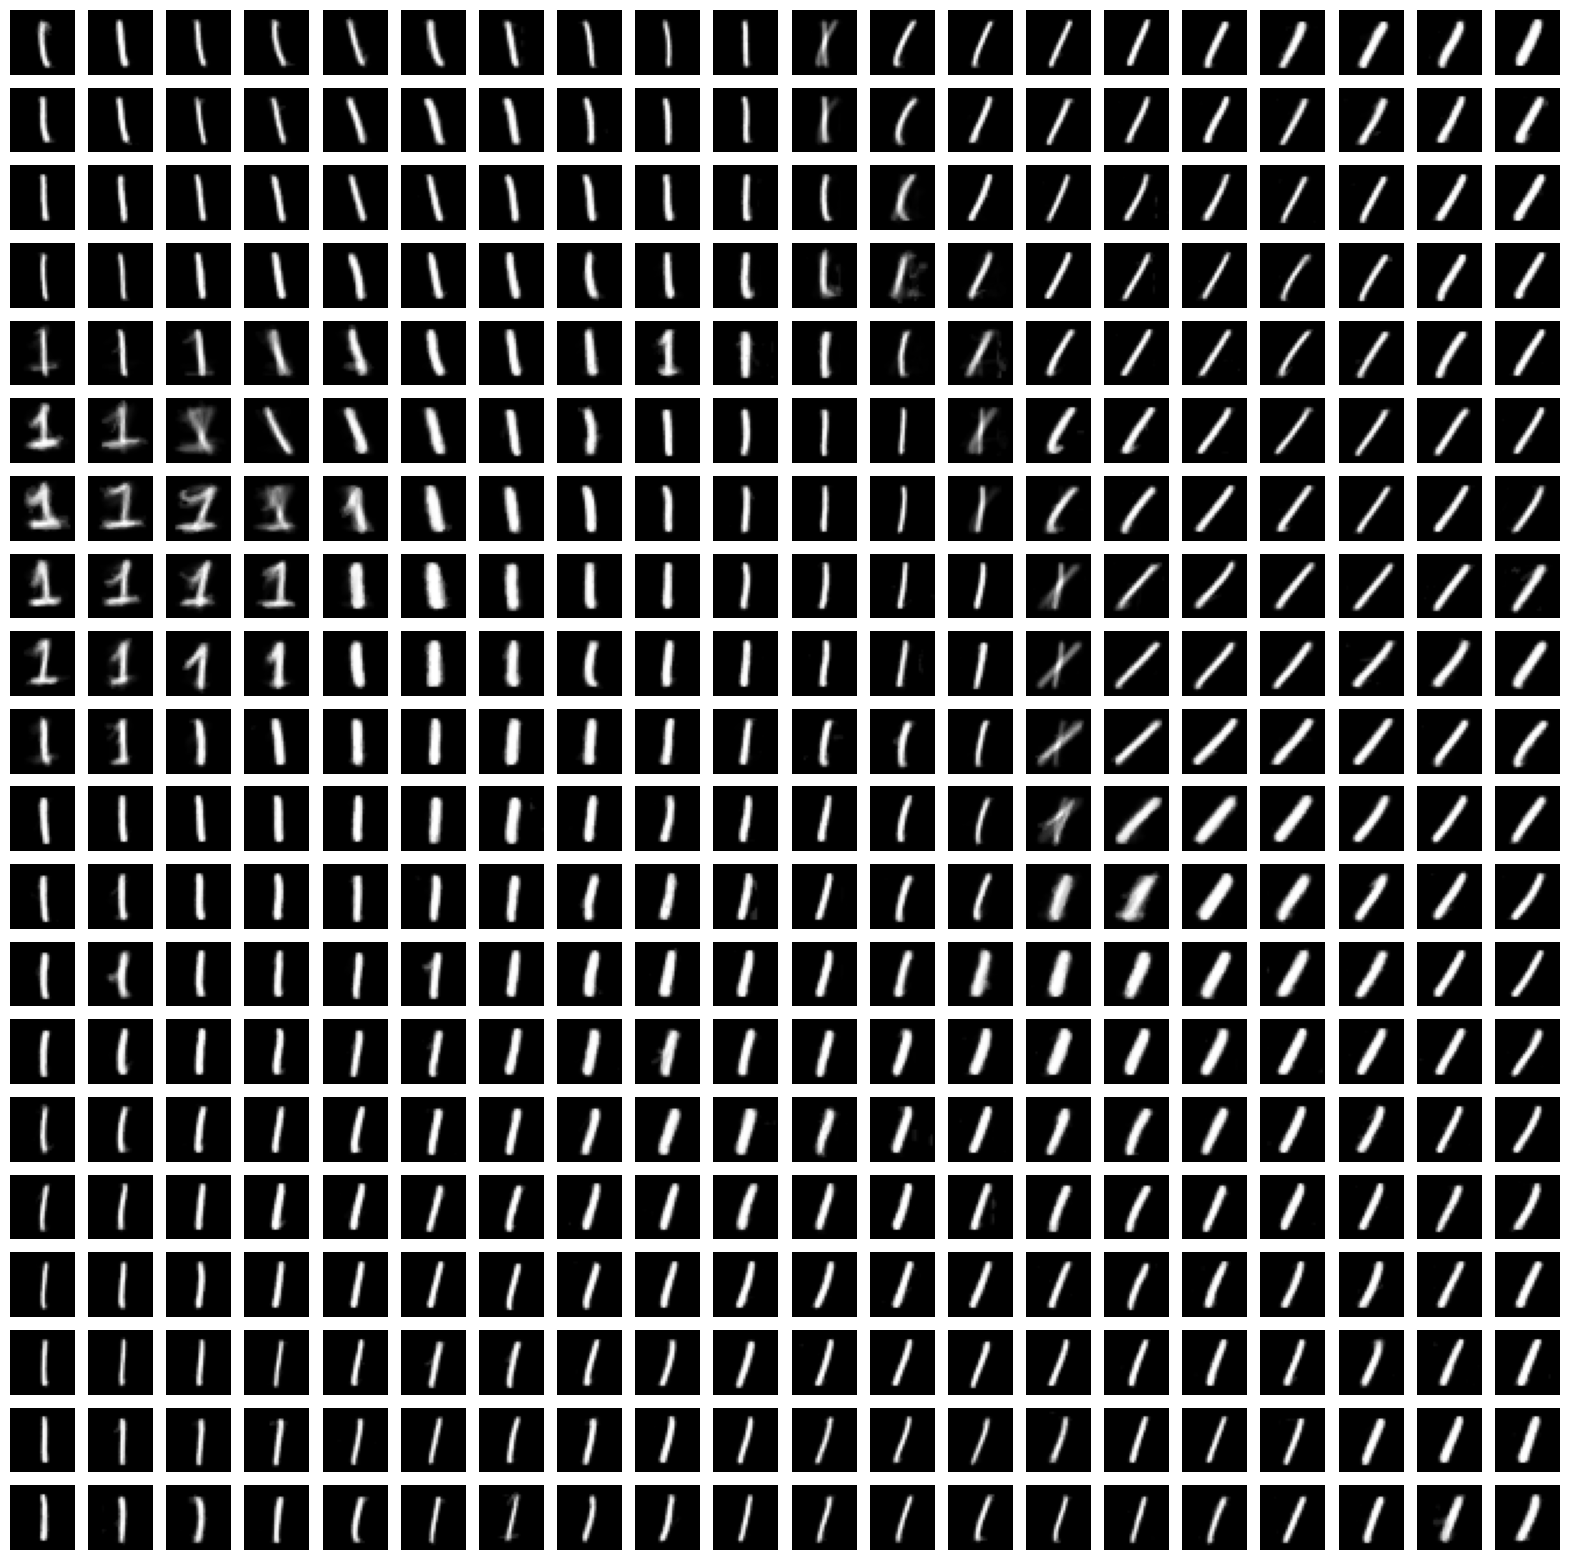

In [ ]:
plot_som_centroids(som, som_size)

In [ ]:
density_sample = np.random.uniform(0,1000, (1000, 3))

for i in range(10):
    for j in range(10):
        for k in range(10):
            z = 100*i+10*j + k
            density_sample[z,0] = i + np.random.randn()*0.01
            density_sample[z,1] = j + np.random.randn()*0.01
            density_sample[z,2] = k + np.random.randn()*0.01

In [ ]:

import plotly.graph_objects as go
import numpy as np

class DensitySOM:
    def __init__(self, density_samples):
        self.density_sample = density_sample
        self.som_size = self.density_sample.shape[0]
        self.som_locations = None
        self.som_centroids = None
        self.learning_rate_initial = learning_rate_initial

    def fit(self, X, iterations, sigma_initial, learning_rate_initial):
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        for iteration in range(iterations):
            print(f'\rIteration {iteration}/{iterations}', end='')
            learning_rate = learning_rate_initial * np.exp(-iteration / iterations)
            sigma = sigma_initial * np.exp(-iteration / iterations)

            # Choose a random sample from the data
            sample = X[np.random.randint(X.shape[0])]

            # Find the winning neuron (the one closest to the sample)
            distances = np.linalg.norm(self.som_centroids - sample, axis=-1)
            winning_position = np.argmin(distances, axis=None)

            # Update the SOM weights
            for i in range(self.som_size):
                distance_to_winner = np.sqrt((self.density_sample[winning_position,0] - self.density_sample[i,0]) ** 2
                                            +(self.density_sample[winning_position,1] - self.density_sample[i,1]) ** 2
                                            +(self.density_sample[winning_position,2] - self.density_sample[i,2]) ** 2)
                weight_update = np.exp(-(distance_to_winner**2) / (2 * sigma**2))
                self.som_centroids[i] += learning_rate * weight_update * (sample - self.som_centroids[i])

    def plot_SOM(self, X):
        # Find the closest neighbor for each point
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        closest_neighbors = {}
        for i, point in enumerate(self.density_sample):
            distances = np.sqrt(np.sum((self.density_sample - point)**2, axis=1))
            distances[i] = np.inf  # Exclude the point itself by setting its distance to infinity
            closest_neighbor_index = np.argmin(distances)
            closest_neighbors[i] = closest_neighbor_index

        # Plot the X
        fig = go.Figure(data=[go.Scatter3d(
            x=X[:, 0],
            y=X[:, 1],
            z=X[:, 2],
            marker=dict(size=2, color='blue'),
        )])


        # Plot lines between each point and its closest neighbor
        for i, closest_neighbor_index in closest_neighbors.items():

            fig.add_trace(go.Scatter3d(
                x=[self.som_centroids[i][0], self.som_centroids[closest_neighbor_index][0]],
                y=[self.som_centroids[i][1], self.som_centroids[closest_neighbor_index][1]],
                z=[self.som_centroids[i][2], self.som_centroids[closest_neighbor_index][2]],
                marker=dict(size=2, color='blue'),
                line=dict(color='red', width=2),
            ))


        fig.update_layout(title="3D Scatter Plot with SOM Centroids"),
        scene=dict(
            xaxis_title='X Axis',
            yaxis_title='Y Axis',
            zaxis_title='Z Axis',
        ),


        fig.show()


    def plot_SOM_grid(self, X):
        # Find the closest neighbor for each point
        self.som_centroids = X[np.random.choice(X.shape[0], self.som_size, replace=False)] if self.som_centroids is None else self.som_centroids

        closest_neighbors = {}
        for i, point in enumerate(self.density_sample):
            distances = np.sqrt(np.sum((self.density_sample - point)**2, axis=1))
            distances[i] = np.inf  # Exclude the point itself by setting its distance to infinity

            closest_neighbors[i] = list()
            for j in range(4):
                closest_neighbors[i].append(np.argsort(distances)[j])

        # Plot the X

        fig_points = go.Figure(data=[go.Scatter3d(
            x=X[:, 0],
            y=X[:, 1],
            z=X[:, 2],
            mode="markers",
            marker=dict(size=2, color='blue'),
        )])

        fig_lines = go.Figure()

        # Plot lines between each point and its closest neighbor
        for i, point in enumerate(self.density_sample):#, closest_neighbor_index in closest_neighbors.items():
            for closest_neighbour in closest_neighbors[i]:

                fig_lines.add_trace(go.Scatter3d(
                x=[self.som_centroids[i][0], self.som_centroids[closest_neighbour][0]],
                y=[self.som_centroids[i][1], self.som_centroids[closest_neighbour][1]],
                z=[self.som_centroids[i][2], self.som_centroids[closest_neighbour][2]],
                mode = "lines",
                # marker=dict(size=2, color='green'),
                line=dict(color='red', width=0.5),
            ))

        fig_com = go.Figure(fig_points.data + fig_lines.data)

        fig_com.update_layout(title="3D Scatter Plot with SOM Centroids",
        scene=dict(
            xaxis_title='X Axis',
            yaxis_title='Y Axis',
            zaxis_title='Z Axis',
        ))


        fig_com.show()



In [ ]:
som_size = 10

In [ ]:
learning_rate_initial = 0.1

densitySOM = DensitySOM(density_sample)
# densitySOM = DensitySOM(density_sample) FOR CIRCLE
# densitySOM.plot_SOM_grid(X_mnist)

In [ ]:
print(densitySOM.som_centroids.shape)

(1000, 784)


In [ ]:
for epoch in range(3):
    print(f'\rEpoch {epoch}/100', end='')
    densitySOM.fit(X_mnist, iterations=10000, sigma_initial=1, learning_rate_initial=0.1)
    # densitySOM.plot_SOM_grid(X_mnist)
    print(f'\rEpoch {epoch}/100', end='')

Epoch 2/100

In [ ]:
from sklearn.neighbors import NearestNeighbors

def round_density_centroids(som, som_size, X_mnist):
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X_mnist)
    round_centroids = np.zeros((som_size, som_size, som_size, 28, 28))
    center = som.som_centroids.reshape(som_size, som_size, som_size, -1)
    for i in range(som_size):
        for j in range(som_size):
            for k in range(som_size):
                centroid = center[i, j, k].reshape(1, -1)
                _, idx = nn.kneighbors(centroid, 1)

                round_centroids[i, j, k] = X_mnist[idx, :].reshape(28, 28)
    return round_centroids

rounded_centroids = round_density_centroids(densitySOM, 10, X_mnist)

In [ ]:
rounded_centroids.shape

(10, 10, 10, 28, 28)

In [ ]:
X3 = np.zeros((som_size**3, 3))
Y3 = np.zeros((som_size**3, 784))

for i in range(som_size):
    for j in range(som_size):
        for k in range(som_size):
            X3[i*som_size**2+j*som_size+k,:] = np.array([i, j, k])
            Y3[i*som_size**2+j*som_size+k,:] = rounded_centroids[i, j, k].reshape(1, -1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

model3 = make_pipeline(PolynomialFeatures(3), XGBRegressor())
model3.fit(X3, Y3)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
X_tru = Y3
X_tru.shape

(1000, 784)

In [ ]:
data_uniform = np.random.uniform(0, 19, (X_tru.shape[0], 3))
data_uniform

array([[ 8.35481273,  7.0729818 , 11.519359  ],
       [18.00728196,  6.18851945,  6.33576422],
       [17.99709751,  6.41365034,  8.36791105],
       ...,
       [14.31739925, 12.01792148, 10.79615738],
       [18.88767478,  1.29802257, 17.28831371],
       [13.06980897,  9.57629748,  4.56296191]])

In [ ]:
generated_images = []
for i, random_point in enumerate(data_uniform):
    generated_images.append(model3.predict(random_point.reshape(1, -1)).reshape(-1))

X_gen = np.array(generated_images)

In [ ]:
X = np.vstack([X_tru, X_gen])
y = np.array(X_tru.shape[0]*[1] + X_gen.shape[0]*[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier. You can adjust the number of neighbors (n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.33%


# learning inverse function

In [ ]:
from sklearn.neighbors import NearestNeighbors

def round_centroids(som, som_size, X_mnist):
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X_mnist)

    round_centroids = np.zeros((som_size, som_size, 28, 28))
    for i in range(som_size):
        for j in range(som_size):
            centroid = som.get_weights()[i, j].reshape(1, -1)
            _, idx = nn.kneighbors(centroid, 1)

            round_centroids[i,j] = X_mnist[idx,:].reshape(28,28)
    return round_centroids

rounded_centroids = round_centroids(som, som_size, X_mnist)

Poniżej: $X \in \mathbb{R}^2$, natomiast $Y\in \mathbb{R}^{784}$. $x_i$ to pozycja $i$-tego centroidu w topologii mapy Kohonena, natomiast $y_i$ to nie jest sama surowa pozycja tego centroidu w $\mathbb{R}^{784}$, tylko $y_i$ to jest najbliższy centroidowi prawdziwy obrazek. Dzięki temu model uczy się na obrazkach z ostrzejszym detalem.

In [ ]:
X = np.zeros((som_size**2, 2))
Y = np.zeros((som_size**2, 784))

for i in range(som_size):
    for j in range(som_size):
        X[i*som_size+j,:] = np.array([i, j])
        Y[i*som_size+j,:] = rounded_centroids[i,j].reshape(1, -1)

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

model = make_pipeline(PolynomialFeatures(2), XGBRegressor())
model.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 0.,  4.],
       [ 0.,  5.],
       [ 0.,  6.],
       [ 0.,  7.],
       [ 0.,  8.],
       [ 0.,  9.],
       [ 0., 10.],
       [ 0., 11.],
       [ 0., 12.],
       [ 0., 13.],
       [ 0., 14.],
       [ 0., 15.],
       [ 0., 16.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 19.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 2.,  2.],
       [ 2.,  3.],
       [ 2.,  4.],
       [ 2.,  5.],
       [ 2.,  6.],
       [ 2.,  7.],
       [ 2.,  8.],
       [ 2.,  9.],
       [ 2., 10.],
       [ 2., 11.],
       [ 2.,

In [ ]:
def plot_generation(model, rounded_centroids):
    som_size = rounded_centroids.shape[0]
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):
            x = np.array([[i, j]]) + np.random.uniform(low=-0.5, high=0.5, size=(2))
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(model.predict(x).reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

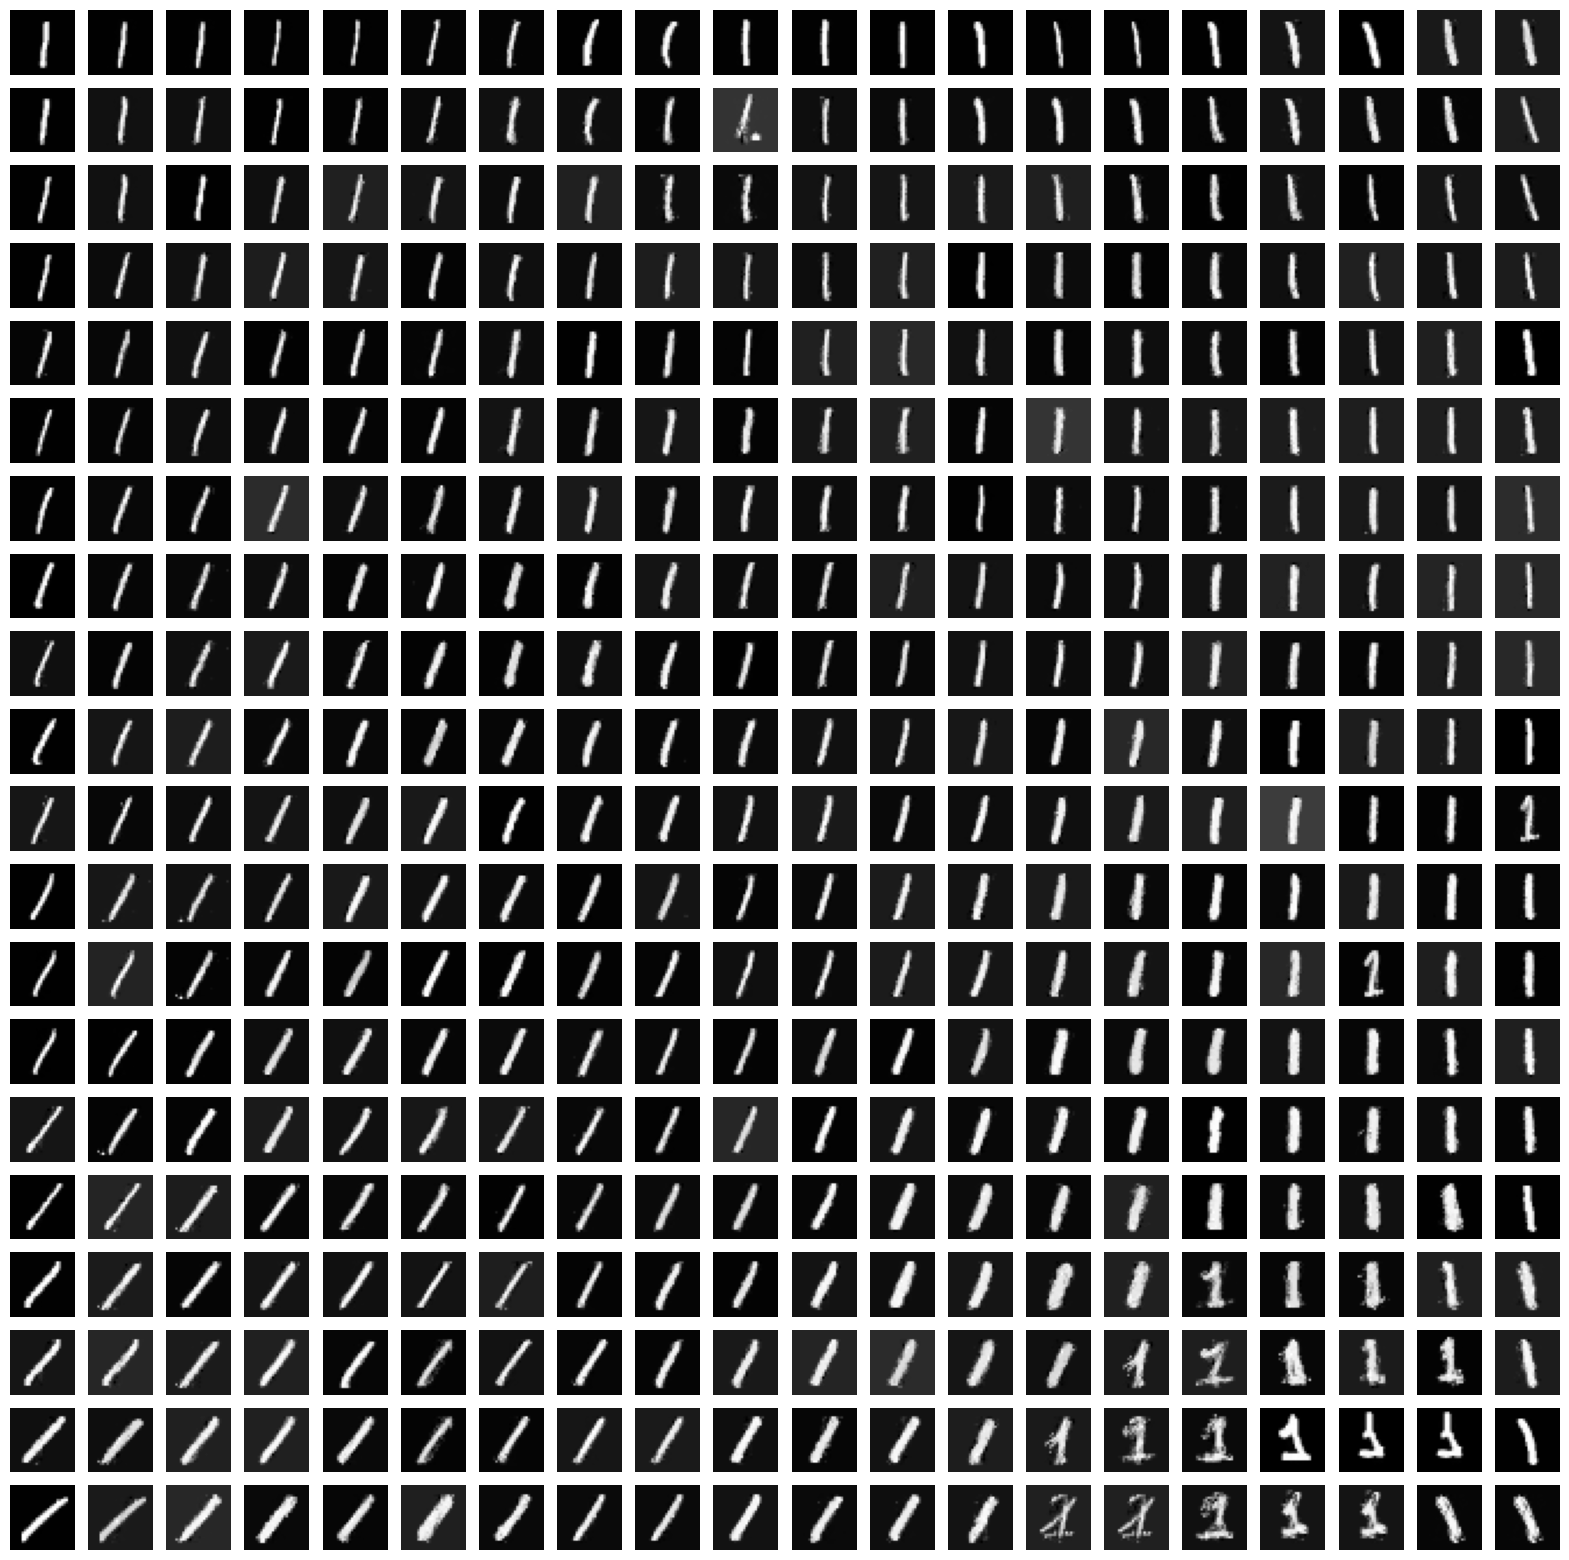

In [ ]:
plot_generation(model, rounded_centroids)

# jak ocenić jakość generacji?

Użyjmy kolejnego klasyfikatora do oceny jakości generowania. Stwórzmy dataset złożony z oryginalnych obrazków i złożony z takiej samej ilości obrazków wygenerowanych przez nas. Labele y mówią 1, gdy prawdziwy, a 0, gdy fejk.
Intuicja:
- jeśli obrazki są słabe, to k-NN będzie miał 100% accuracy przy klasyfikacji
- jeśli obrazki są idealnie wierne oryginałom, to accuracy będzie bardzo niskie

Zadanie do pomyślenia:
- **czy w ogóle możliwe jest, aby 1-NN klasyfikator mógł mieć kiedykolwiek 0% accuracy? co dla 2-NN?**

In [ ]:
X_tru = Y
X_tru.shape

(400, 784)

In [ ]:
data_uniform = np.random.uniform(0, 19, (X_tru.shape[0], 2))
data_uniform

array([[ 7.17419472, 15.14432389],
       [ 7.99055217,  9.95894588],
       [13.87753911, 17.91931906],
       [15.32007783, 14.13415332],
       [16.30847379, 10.98219795],
       [14.43554932, 18.42522592],
       [ 7.78125532,  5.01116294],
       [16.7044932 ,  5.9468968 ],
       [ 5.57628212, 18.70323812],
       [ 7.36784571,  1.60896479],
       [ 6.91517861, 13.59292919],
       [ 9.45870756, 17.83267786],
       [ 2.82021416, 12.41314784],
       [12.37052452, 18.7753237 ],
       [16.35035396, 12.17049964],
       [11.22743106, 14.61943709],
       [16.63190924, 16.45112253],
       [13.10419069, 14.28867144],
       [ 5.45757622,  4.91416926],
       [ 6.8321214 , 17.57785317],
       [ 2.27381116, 16.74029492],
       [ 3.21695984,  9.38633397],
       [ 0.29769844, 16.6177647 ],
       [12.76248685, 11.71738612],
       [ 9.48277235, 15.00544736],
       [17.58380191, 17.30122745],
       [ 8.00174558, 15.25884628],
       [11.7002847 ,  2.80023982],
       [ 5.07677302,

In [ ]:
data_uniform.shape

(400, 2)

In [ ]:
generated_images = []
for i, random_point in enumerate(data_uniform):
    generated_images.append(model.predict(random_point.reshape(1, -1)).reshape(-1))

X_gen = np.array(generated_images)

In [ ]:
X_gen.shape

(400, 784)

In [ ]:
X = np.vstack([X_tru, X_gen])
y = np.array(X_tru.shape[0]*[1] + X_gen.shape[0]*[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier. You can adjust the number of neighbors (n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.00%


In [ ]:
def plot_generated_images(generated_images):
    plt.figure(figsize=(som_size, som_size))
    for i in range(som_size):
        for j in range(som_size):
            plt.subplot(som_size, som_size, i*som_size+j+1)
            plt.imshow(generated_images[i*som_size + j].reshape(28,28), cmap='gray')
            plt.axis('off')
    plt.show()

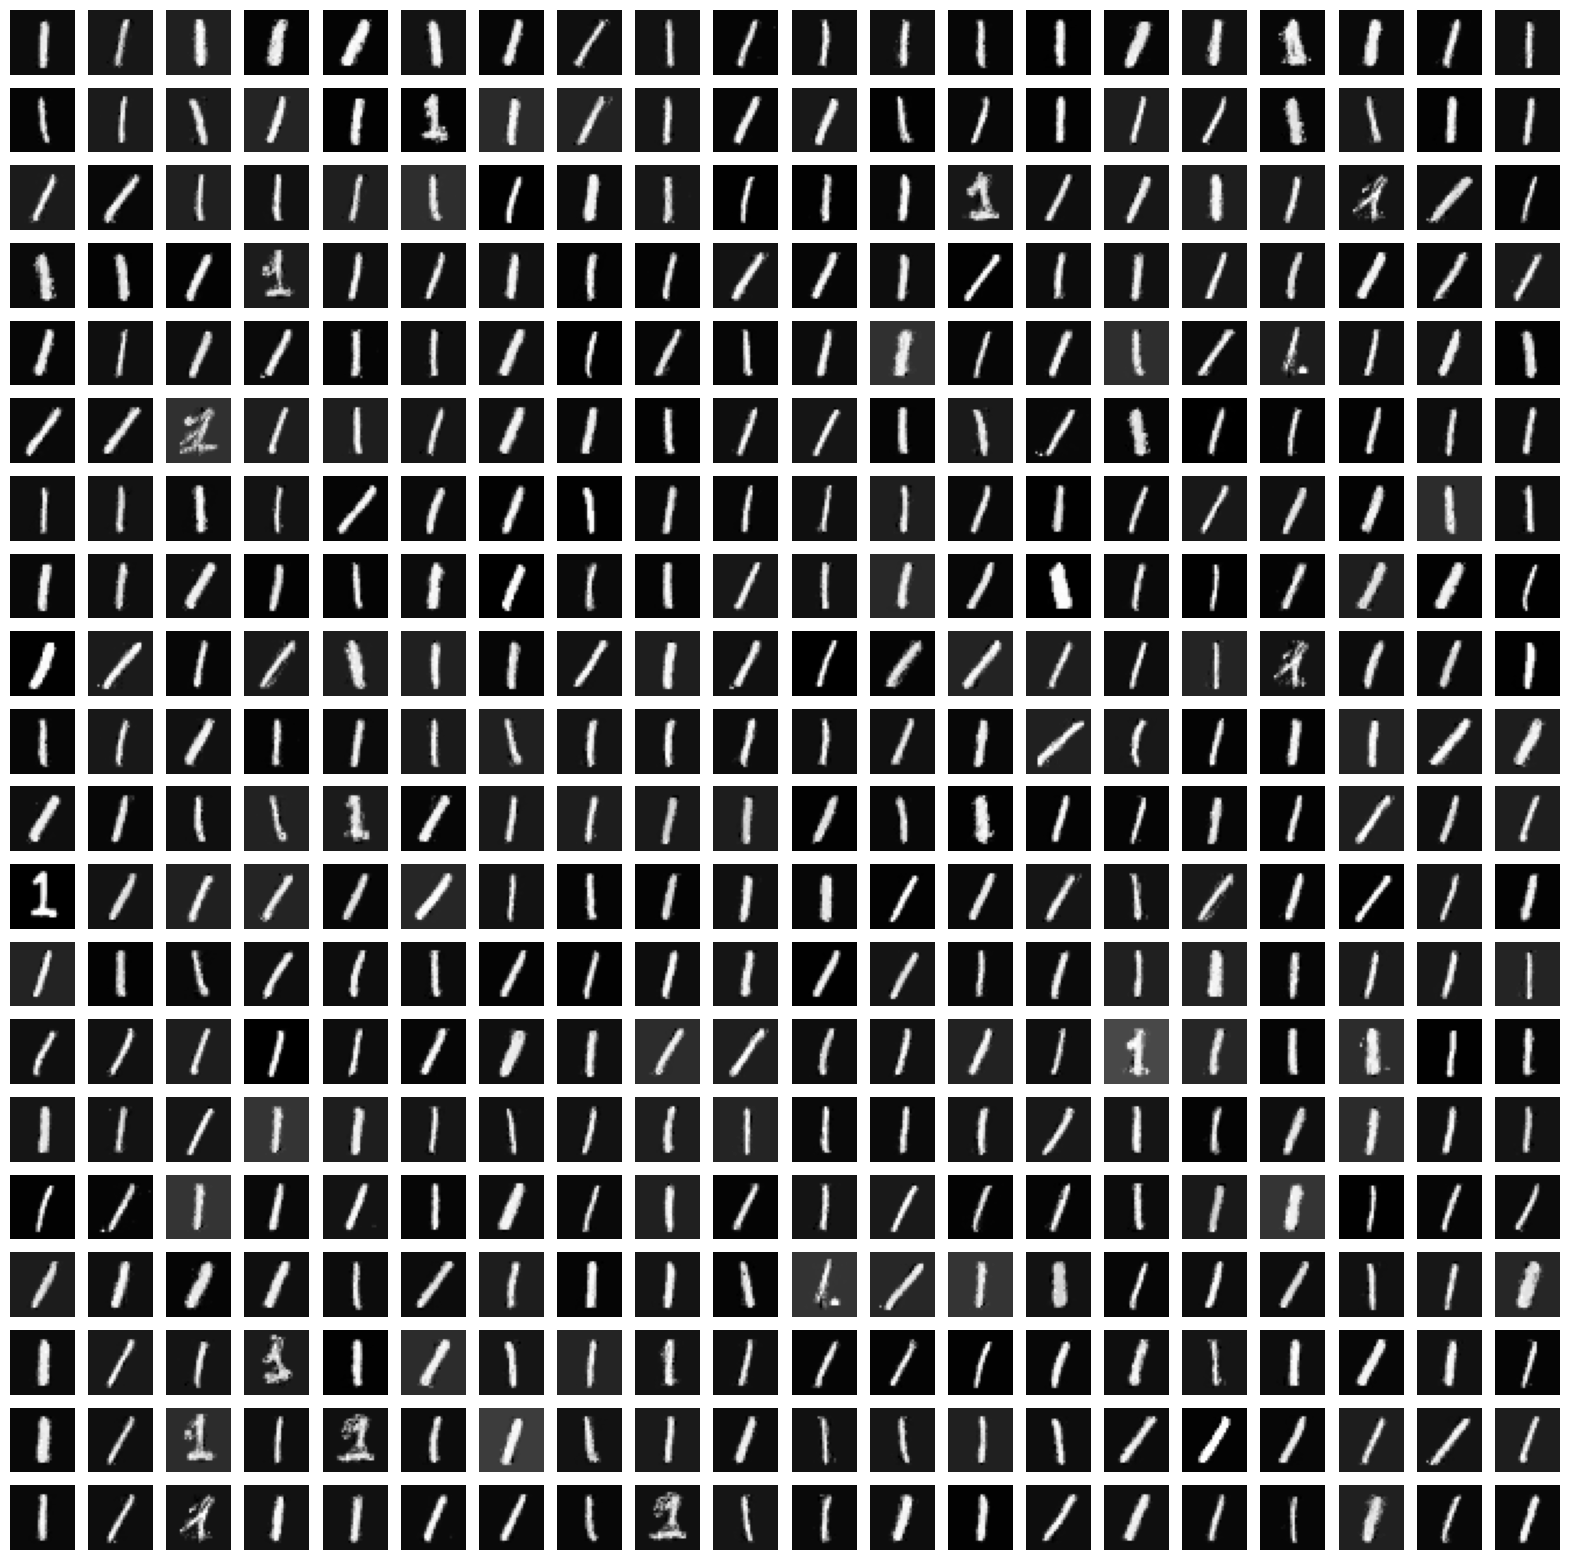

In [ ]:
plot_generated_images(generated_images)